# Fuzzy

## Pengertian Fuzzy


Fuzzy merupakan salah satu pendekatan dari kecerdasan komputasional untuk mengelolah *uncertaity information* (Informasi Kepastian) dan pengambilan kesimpulan dengan menggunan bahasa natural.

Bahasa Natural ini digunakan untuk mempresentasikan domain permasalahan, aturan, ataupun domain solusi, sebagai pengganti angka. Misalkan suhu sangat panas, kecepatan mobil kurang cepat, nilai mahasiswa yang rendah, dan lain-lain



## Implementasi Fuzzy Menggunakan Python

## Fuzzy Mamdani
Studi Kasus

Penentuan Beasiswa terdapat dua hal yang harus dipertimbangkan agar memper oleh beasiswa yaitu prestasi mahasiswa (IPK), dan pendapatan orang tua.

Input nilai ini dimulai dari 0-4 dengan variable nilai memiliki 3 fuzzy value yaitu rendah, sedang, tinggi.parameter fungsi yang digunaan segitiga yang harus ditentukan adalah nilai $\alpha,\beta$ dan γ 

* fuzzy value rendah [ α = 0 ; β = 0; γ = 2 ]

* fuzzy value sedang [ α = 1.5 ; β = 2.5 ; γ = 3.5 ]

* fuzzy value tinggi [ α = 3; β = 4 ; γ = 4 ]


Input pendapatan orang tua dimulai dar 0-20 dengan memiliki 3 fuzzy value yairu rendah, cukup, tinggi.
Parameter fungsi yang digunakan adalah trapesium maka parameter yang harus ditentukan yaitu α, β, γ dan δ

* fuzzy value rendah [α = 0 ; β = 0 ; γ = 2 ; δ = 4]

* fuzzy value cukup [α = 2 ; β = 6 ; γ = 9 ; δ = 13]

* fuzzy value tinggi  [α = 10 ; β = 14 ; γ = 20 ; δ = 20]


Perhitungan menggunakan Python

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 8.8 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=7d249bae73320dce852bff964ae7da8ad1430376c1ea77c7dd8ef60df00a9687
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy

In [3]:
beasiswa = np.arange(0,3.05,0.05)
nilai = np.arange(0,4.05,0.05)
pendapatan = np.arange(0,20.05,0.05)

Pengelompokan

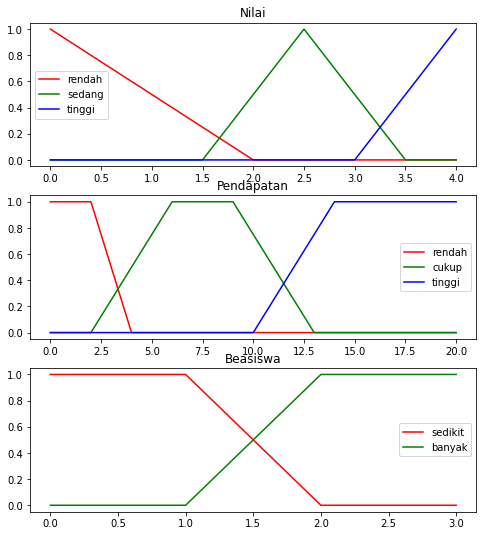

In [4]:
%matplotlib inline
fig, (mf1, mf2, mf3) = plt.subplots(nrows=3, figsize=(8,9))

# NILAI
fuzzy_nilai_rendah = skfuzzy.trimf(nilai, [0, 0, 2])
fuzzy_nilai_sedang = skfuzzy.trimf(nilai, [1.5, 2.5, 3.5])
fuzzy_nilai_tinggi = skfuzzy.trimf(nilai, [3, 4, 4])

mf1.plot(nilai, fuzzy_nilai_rendah, "r", label="rendah")
mf1.plot(nilai, fuzzy_nilai_sedang, "g", label="sedang")
mf1.plot(nilai, fuzzy_nilai_tinggi, "b", label="tinggi")
mf1.set_title("Nilai")
mf1.legend()


# PENDAPATAN
fuzzy_pendapatan_rendah = skfuzzy.trapmf(pendapatan, [0, 0, 2, 4])
fuzzy_pendapatan_cukup = skfuzzy.trapmf(pendapatan, [2, 6, 9, 13])
fuzzy_pendapatan_tinggi = skfuzzy.trapmf(pendapatan, [10, 14, 20, 20])

mf2.plot(pendapatan, fuzzy_pendapatan_rendah, "r", label="rendah")
mf2.plot(pendapatan, fuzzy_pendapatan_cukup, "g", label="cukup")
mf2.plot(pendapatan, fuzzy_pendapatan_tinggi, "b", label="tinggi")
mf2.set_title("Pendapatan")
mf2.legend()


# BEASISWA
fuzzy_beasiswa_sedikit = skfuzzy.trapmf(beasiswa, [0, 0, 1, 2])
fuzzy_beasiswa_banyak = skfuzzy.trapmf(beasiswa, [1, 2, 3, 3])

mf3.plot(beasiswa, fuzzy_beasiswa_sedikit, "r", label="sedikit")
mf3.plot(beasiswa, fuzzy_beasiswa_banyak, "g", label="banyak")
mf3.set_title("Beasiswa")
mf3.legend()

Data

In [5]:
dataNilai = 3.5
dataPendapatan = 2.5

Fuzzifikasi

In [6]:
# Fuzzifikasi Variable Nilai
nilai_rendah = skfuzzy.interp_membership(nilai, fuzzy_nilai_rendah, dataNilai)
nilai_sedang = skfuzzy.interp_membership(nilai, fuzzy_nilai_sedang, dataNilai)
nilai_tinggi = skfuzzy.interp_membership(nilai, fuzzy_nilai_tinggi, dataNilai)
nilai_tinggi = skfuzzy.interp_membership(nilai, fuzzy_nilai_tinggi, dataNilai)

# Fuzzifikasi Variable Pendapatan
pendapatan_rendah = skfuzzy.interp_membership(pendapatan, fuzzy_pendapatan_rendah, dataPendapatan)
pendapatan_cukup = skfuzzy.interp_membership(pendapatan, fuzzy_pendapatan_cukup, dataPendapatan)
pendapatan_tinggi = skfuzzy.interp_membership(pendapatan, fuzzy_pendapatan_tinggi, dataPendapatan)

# ------------------------------------------
print("Fuzzifikasi Variable Input Nilai")
print("nilai-rendah =", nilai_rendah)
print("nilai-sedang =", nilai_sedang)
print("nilai-tinggi =", nilai_tinggi)

print("\nFuzzifikasi Variable input pendapatan")
print("pendapatan-rendah =", pendapatan_rendah)
print("pendapatan-cukup  =", pendapatan_cukup)
print("pendapatan-tinggi =", pendapatan_tinggi)

Fuzzifikasi Variable Input Nilai
nilai-rendah = 0.0
nilai-sedang = 0.0
nilai-tinggi = 0.5

Fuzzifikasi Variable input pendapatan
pendapatan-rendah = 0.75
pendapatan-cukup  = 0.125
pendapatan-tinggi = 0.0


Eksekusi Fuzzy

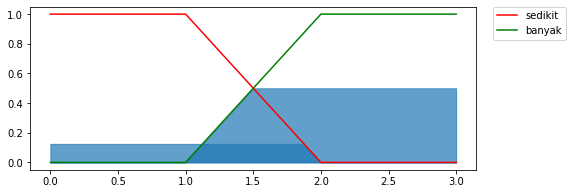

In [7]:
%matplotlib inline
# Antacendent
AM1 = np.fmin(nilai_rendah, pendapatan_rendah)
AM2 = np.fmin(nilai_sedang, pendapatan_cukup)
AM3 = np.fmin(nilai_tinggi, pendapatan_cukup)
AM4 = np.fmin(nilai_tinggi, pendapatan_rendah)


# operasikan antacendent dengan consequnt
R1 = np.fmin(AM1, fuzzy_beasiswa_sedikit)
R2 = np.fmin(AM2, fuzzy_beasiswa_sedikit)
R3 = np.fmin(AM3, fuzzy_beasiswa_sedikit)
R4 = np.fmin(AM4, fuzzy_beasiswa_banyak)


fig2, ax1 = plt.subplots(1,figsize=(8,3))
ax1.plot(beasiswa, fuzzy_beasiswa_sedikit, "r" , label="sedikit")
ax1.plot(beasiswa, fuzzy_beasiswa_banyak, "g", label="banyak")
ax1.fill_between(beasiswa, R3, color='C0', alpha=0.7)
ax1.fill_between(beasiswa, R4, color='C0', alpha=0.7)
ax1.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)

Agregrasi Dan Defuzzifukasi

In [8]:
# Agregasi
agregasi = np.fmax(R1, np.fmax(R2, np.fmax(R3, R4)))

# defuzzifikasi
output = skfuzzy.defuzz(beasiswa, agregasi, "centroid")
output

1.9096404215747054

## Fuzzy Takagi-Sugeno-Kang

Aturan Fuzzy Takagi-Sugeno-Kang



1.   IF nilai rendah AND pendapatan rendah THEN beasiswa = 0.1 * nilai + 0.2 * pendapatan
2.   IF nilai sedang AND pendapatan cukup THEN beasiswa = 0.2 * nilai + 0.2 * pendapatan
3.   IF nilai tinggi AND pendapatan cukup THEN beasiswa = 0.4 * nilai + 0.2 * pendapatan
4.   IF nilai tinggi AND pendapatan rendah THEN beasiswa = 0.5 * nilai + 0.3 * pendapatan



Eksekusi Fuzzy

In [9]:
AM1 = np.fmin(nilai_rendah, pendapatan_tinggi)
AM2 = np.fmin(nilai_sedang, pendapatan_cukup)
AM3 = np.fmin(nilai_tinggi, pendapatan_cukup)
AM4 = np.fmin(nilai_tinggi, pendapatan_rendah)
 
R1 = 0.1 * dataNilai + 0.2 * dataPendapatan
R2 = 0.2 * dataNilai + 0.2 * dataPendapatan
R3 = 0.3 * dataNilai+ 0.2 * dataPendapatan
R4 = 0.5 * dataNilai + 0.3 * dataPendapatan

Hasil

In [10]:
R1 + R2 + R3 + R4

6.1000000000000005

In [11]:
output = sum([R1 * AM1, R2 * AM2, R3 * AM3, R4 * AM4]) / sum([AM1, AM2, AM3, AM4])
output

2.31